# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [15]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


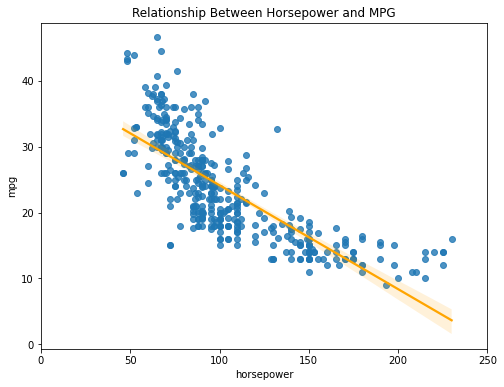

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us? RSS = SSE

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- loss function for the OLS line above
- predicted values (the line) minus actual (sqaured) - measure of loss for model with different slope/coefficients
- optimal slope of ~ -0.158


### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [ ]:
# call_on_students(1)

#### Answer: 

- start with our guess (top upper left corner)
- calculate the gradient (derivative in respect to our features)
    - will point towards steepest increase
- need to use the gradient to try and descent the loss function
    - always want to move oppposite the gradient
    - minimize our loss (SSE)
- take a step down and make a new 'guess'
    - step size is proportional the gradient (larger gradient, the larger the step)
    - directly tied to 'learning rate' : constant of proportionality
- repeat and iterate over this process as we descent the loss function
    - goal is get to a gradient of 0 : the minimum of our loss function : weight with the lowest error

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- How far we move down the loss function : how much we update our next 'guess'
- learning rate is constant of proportionality
    - directly controls how large of a step we step : how much of the gradient we use to update
- smaller learning rate means we need to take more steps
    - will take longer to reach minimum : more iterations
- larger learning rate means we are taking bigger steps down
    - could potentially overshoot the minimum and never descend properly : bouncing across

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- categorical target : classifcation
- logit transformation that gets than gets transformed into probability via sigmoid
    - predict the probability of the positive class
    - uses threshold (default of 0.5) to create our class predictions
- linear is for continuous, logistic for catergorical
    - very similar in that they both use a linear formula
    - logistic is being transformed
- we have weights (ie coefficients) so it is still parametric
    - logit transformation = logodds of positive class

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- less prone to overfit compared to decision tree
    - by default logistic regression implemnets l2 regularization
- need to scale or normalize data as opposed to decision trees
- more sensitive to outliers than decision trees
- less sensitive to class imbalance versus decision trees


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [7]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [8]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
363,4,112.0,88,2640,18.6,82,1
180,4,107.0,86,2464,15.5,76,2
119,4,121.0,112,2868,15.5,73,2
307,4,98.0,76,2144,14.7,80,2
219,8,305.0,145,3880,12.5,77,1


In [9]:
X_train.shape, y_train.shape

((262, 7), (262,))

In [10]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [11]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [12]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- We have a bit of class imbalancce ~ 75 to 25


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Dummy model that always predicts 0 (our majority - most frequent class)


#### Part 3: How accurate would that baseline be on test data?


In [13]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- This model would 75% accurate on testing data : misleading due to class imbalance


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Class imbalance : not enough data points from our minority class to be able to predict it well
- Use a different metric than accuracy
- Could change the threshold to force more positive or negative predictions
    - big trade off
- We could use class_weights hyperparameter : set to 'balanced'
    - will weight minority class more during training
- Oversampling, undersampling
    - generate synthetic data to have more data points of the minority class

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our train and test set

In [ ]:
# call_on_students(1)

In [14]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

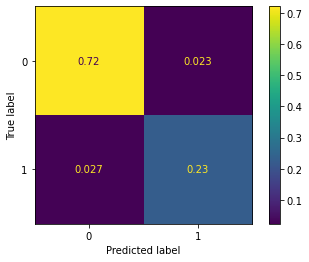

In [22]:
# Plot a confusion matrix on the train data
cm = confusion_matrix(y_train, logreg.predict(X_train_sc), normalize='all')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

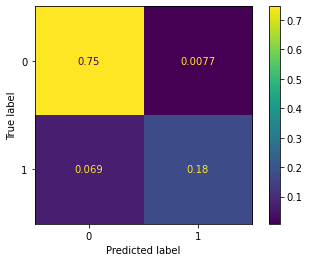

In [23]:
# Plot a confusion matrix on the test data
cm = confusion_matrix(y_test, logreg.predict(X_test_sc), normalize='all')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### 10) Calculate the accuracy, precision, recall and f1-score for the train and test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [24]:
y_pred_train = logreg.predict(X_train_sc)
y_pred_test = logreg.predict(X_test_sc)

In [25]:
y_pred_train_notsc = logreg.predict(X_train)
y_pred_train_notsc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y_pred_train == y_pred_train_notsc

array([False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True,

In [27]:
# Accuracy
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.950381679389313, 0.9230769230769231)

In [28]:
# Precision
precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)

(0.9090909090909091, 0.9583333333333334)

In [29]:
# Recall
recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)

(0.8955223880597015, 0.71875)

In [30]:
# F1-Score
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(0.9022556390977443, 0.8214285714285714)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the train and test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [36]:
# call_on_students(1)
train_probs = logreg.predict_proba(X_train_sc)[:, 1]
train_probs

array([3.08839536e-04, 1.77789797e-03, 2.79469877e-02, 1.45663821e-04,
       6.52574258e-01, 2.07643680e-03, 5.44045335e-03, 2.15504850e-04,
       2.67758227e-01, 5.55189745e-01, 8.31719722e-01, 8.94206482e-02,
       2.52079203e-03, 9.44338777e-03, 3.79958082e-03, 4.91944541e-04,
       2.96686540e-03, 9.99200068e-01, 3.38832699e-02, 1.38517973e-03,
       9.73209160e-01, 5.71700191e-04, 9.95638947e-01, 1.55706987e-02,
       3.60042827e-04, 2.25488806e-03, 1.80536927e-04, 9.66095423e-01,
       1.18480393e-04, 9.30636326e-05, 9.98649124e-01, 1.85183731e-04,
       7.77188935e-03, 1.99803024e-01, 9.60115317e-01, 9.96110885e-01,
       9.47843476e-01, 1.35295649e-01, 1.05573985e-03, 4.51953117e-03,
       1.97759278e-01, 1.02732839e-01, 9.88084882e-01, 1.85637382e-02,
       9.86755430e-01, 7.70238275e-04, 1.17523746e-01, 9.87290827e-01,
       2.63173617e-04, 2.02806001e-04, 1.61247270e-02, 7.86678936e-04,
       7.10054329e-04, 5.73133261e-02, 1.55560490e-03, 8.99595333e-01,
      

In [37]:
test_probs = logreg.predict_proba(X_test_sc)[:, 1]

In [39]:
# Calculate roc-auc
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

fpr_train, tpr_train, thres_train = roc_curve(y_train, train_probs)
fpr_test, tpr_test, thres_test = roc_curve(y_test, test_probs)

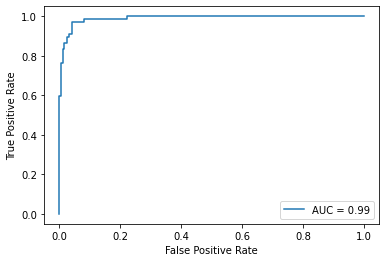

In [41]:
# Plot the ROC curve
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=train_auc).plot();

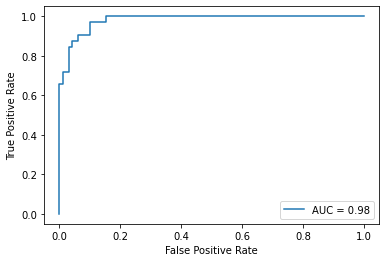

In [42]:
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=test_auc).plot();

In [43]:
logreg2 = LogisticRegression(random_state=42, class_weight='balanced')
logreg2.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [44]:
y_pred_train2 = logreg2.predict(X_train_sc)
y_pred_test2 = logreg2.predict(X_test_sc)

In [45]:
recall_score(y_train, y_pred_train2), recall_score(y_test, y_pred_test2)

(0.9701492537313433, 0.875)

In [46]:
precision_score(y_train, y_pred_train2), precision_score(y_test, y_pred_test2)

(0.8783783783783784, 0.9032258064516129)

### 12) Evaluate! Based on the metrics of our train and test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- model isn't bad, decently high scores but we are overfit, in particular for recall. Model has a number of false negatives with testing data


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [47]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

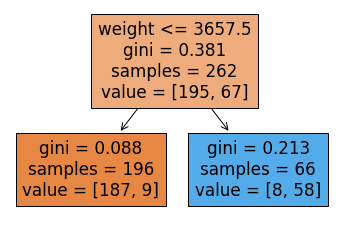

In [48]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

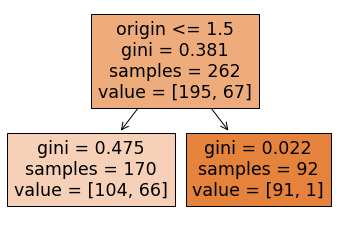

In [49]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The weight feature creates the more pure nodes : lower gini scores across the two child nodes


In [51]:
dt_maxdepth1_v3 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v3.fit(X_train[['weight', 'origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

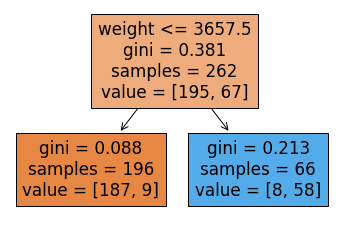

In [52]:
plot_tree(dt_maxdepth1_v3, feature_names=['weight', 'origin'], filled=True);

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our train and test set

In [ ]:
# call_on_students(1)

In [109]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
dt_sc = DecisionTreeClassifier(random_state=42)
dt_sc.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
dt_sc.get_depth()

7

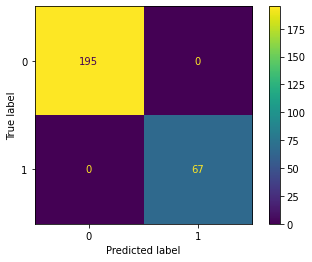

In [112]:
# Plot a confusion matrix on the train data
cm = confusion_matrix(y_train, dt.predict(X_train))
ConfusionMatrixDisplay(cm).plot();

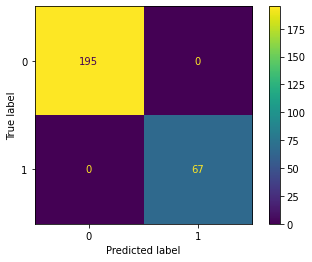

In [113]:
cm = confusion_matrix(y_train, dt_sc.predict(X_train_sc))
ConfusionMatrixDisplay(cm).plot();

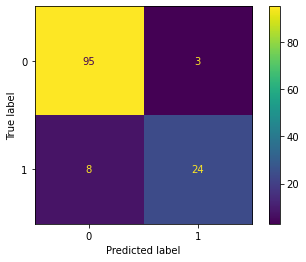

In [114]:
# Plot a confusion matrix on the test data
cm = confusion_matrix(y_test, dt.predict(X_test))
ConfusionMatrixDisplay(cm).plot();

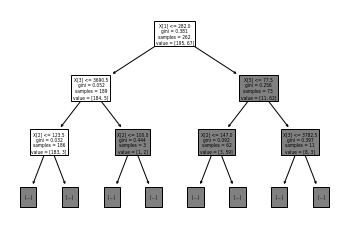

In [115]:
plot_tree(dt, max_depth=2);

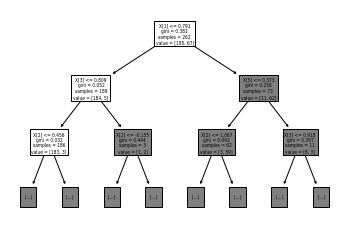

In [116]:
plot_tree(dt_sc, max_depth=2);

In [117]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

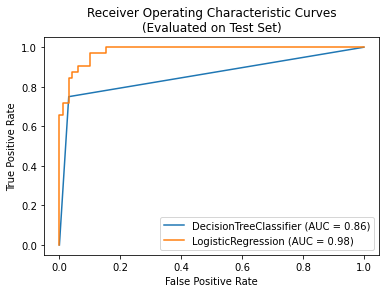

In [118]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt_sc, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

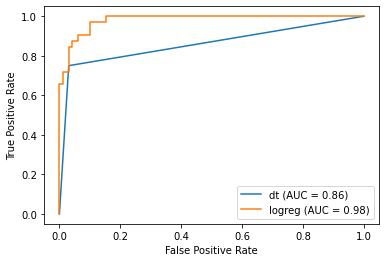

In [119]:
dt_pred_probs = dt_sc.predict_proba(X_test_sc)[:,1]
log_pred_probs = logreg.predict_proba(X_test_sc)[:,1]

fpr1, tpr1, thresh1 = roc_curve(y_test, dt_pred_probs)
fpr2, tpr2, thresh2 = roc_curve(y_test, log_pred_probs)
fig, ax = plt.subplots()
RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc_score(y_test, dt_pred_probs), 
                estimator_name='dt').plot(ax=ax)
RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc_score(y_test, log_pred_probs),
                estimator_name='logreg').plot(ax=ax);

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [120]:
# call_on_students(1)

#### Answer:

- logreg model is better, higher AUC score. Able to distinguish b/t class better
